**Life Expectancy and GDP**

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


the dataset has 4 variable and it seems it does not have any missing value. Let's now explore how many distinct values there are in the Country and Year column. This will help decide what kind of graph to use

In [4]:
print("the Country variable has", len(data["Country"].unique()), "values, namely:", data["Country"].unique())
print("the Year variable has", len(data["Year"].unique()), "values, ranging from", data["Year"].min(), "to", data["Year"].max())

the Country variable has 6 values, namely: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
the Year variable has 16 values, ranging from 2000 to 2015


In [5]:
data['Country'].replace('United States of America', 'US', inplace=True)

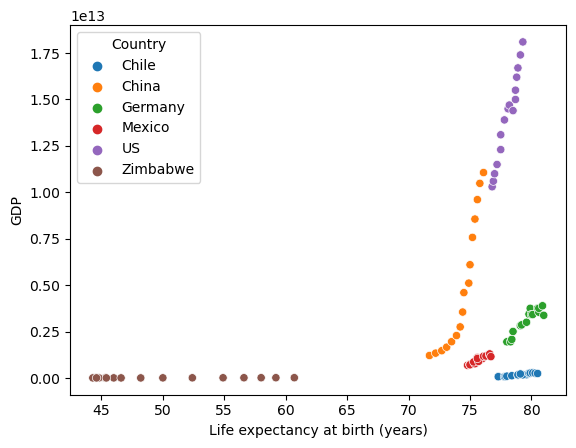

In [6]:
sns.scatterplot(x= data["Life expectancy at birth (years)"], y= data["GDP"], hue=data["Country"])
plt.show()

The scatterplot seems to show different patterns for each country, possibly due to the role of time in changing the GDP and life expectancy values. Let's now try to explore the role of time

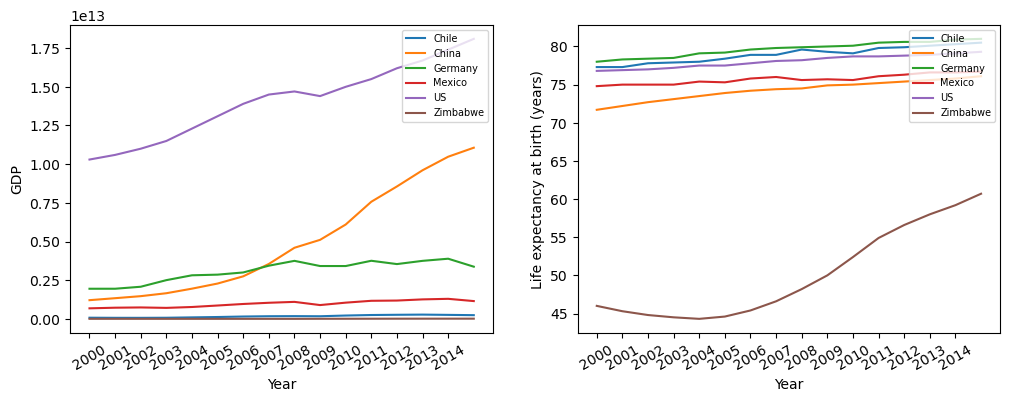

In [7]:
plt.figure(figsize=(12,4))
ax1= plt.subplot(1,2,1)
sns.lineplot(x=data["Year"], y=data["GDP"], hue= data["Country"])
ax1.set_xticks(range(2000, 2015))
ax1.set_xticklabels(range(2000, 2015), rotation=30)
plt.legend(loc=1, fontsize=7)
ax2 = plt.subplot(1,2,2)
sns.lineplot(x=data["Year"], y=data["Life expectancy at birth (years)"], hue= data["Country"])
plt.legend(loc=1, fontsize=7)
ax2.set_xticks(range(2000, 2015))
ax2.set_xticklabels(range(2000, 2015), rotation=30)
plt.show()

From the graphs, both GPD and Life expectancy seem to generally increase over time. 
In particular, GDP seems to have increased more for US and China compared to Germany and Mexico, while GDP seems to be stable for Chile and Zimbabwe
For what concerns life expectancy, it seems it increased particularly for Zimbabwe. However, the huge increase in GDP of US and China as well as the huge increase in Life expectancy in Zimbabwe may have flattened the increase in the other countries. Let's explore this data without these 3 extreme values

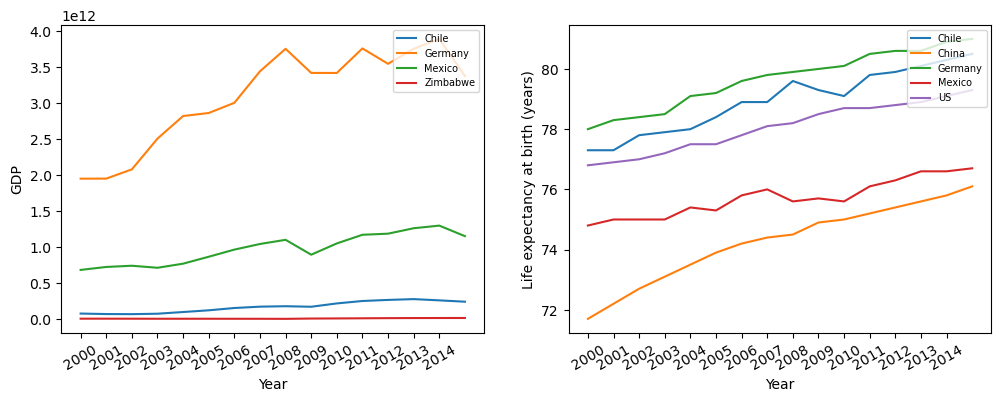

In [8]:
plt.figure(figsize=(12,4))
ax1= plt.subplot(1,2,1)
sns.lineplot(x=data["Year"], y=data["GDP"], hue= data["Country"][(data["Country"]!="US") & (data["Country"]!="China")])
ax1.set_xticks(range(2000, 2015))
ax1.set_xticklabels(range(2000, 2015), rotation=30)
plt.legend(loc=1, fontsize=7)
ax2 = plt.subplot(1,2,2)
sns.lineplot(x=data["Year"], y=data["Life expectancy at birth (years)"], hue= data["Country"][data["Country"]!="Zimbabwe"])
plt.legend(loc=1, fontsize=7)
ax2.set_xticks(range(2000, 2015))
ax2.set_xticklabels(range(2000, 2015), rotation=30)
plt.show()


After removing the countries with larger development, it still seems that both GDP and life expectancy increase over time
But what will happen when we remove the "Time" variable? Is there still a relationship between life expectancy and GDP?

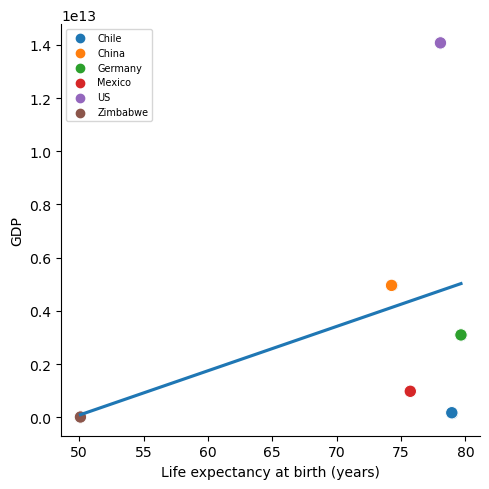

In [9]:
data_grouped = data.groupby(by="Country").mean().reset_index()


sns.lmplot(x="Life expectancy at birth (years)", y="GDP", data=data_grouped,
           ci=None, scatter_kws={"s": 50});
sns.scatterplot(x= data_grouped["Life expectancy at birth (years)"], y= data_grouped["GDP"], hue=data_grouped["Country"], s= 80)
plt.legend(loc=2, fontsize=7)
plt.show()

in general, it still seems that higher GDP will involve higher life expectancy